Завдання:

Створення власного набору даних для класифікації:
- Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).
- Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").

Побудова нейронної мережі для класифікації:
- Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).
- Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.

Експерименти з покращенням результатів:
- Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
- Збільште кількість нейронів у кожному шарі.
- Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
- Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.

Візуалізація процесу навчання:
- Здійсніть візуалізацію зміни функції втрат та точності на тренувальному та тестувальному наборах даних під час тренування моделі

### Бінарна класифікація

In [19]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import regularizers

In [5]:
np.random.seed(19)

#кількість атрибутів
n_samples = 10_000

#два числові атрибути (оцінки студентів)
attribute_a = np.random.uniform(low=0, high=100, size=n_samples)
attribute_b = np.random.uniform(low=0, high=100, size=n_samples)

noise = np.random.normal(loc=0, scale=5, size=n_samples) #умовні додаткові бали
attribute_a += noise
attribute_b += noise

#визначення пройшов/не пройшов; якщо менше 36 - автоматично за бортом
passed = ~((attribute_a < 36) | (attribute_b < 36))
# тільда змінює логічне значення виразу, що мені й потрібно


#створюємо датафрейм
data = pd.DataFrame({
    'Оцінка 1': attribute_a,
    'Оцінка 2': attribute_b,
    'Пройшов:': passed.astype(int)
})

#зберігаю
data.to_csv('data_for_binary_classification.csv', index=False)

#ознаки і цільова змінна
X = np.column_stack((attribute_a, attribute_b))
y = passed.astype(int)

#розділення на набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#нейронка 3 шари
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

#компіляція моделі
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#тренуємо модель
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

#оцінка ефективності моделі на тестовому наборі
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_train, y_train)

print(f'Тестова точність: {test_acc}')
print(f'Тестові втрати: {test_loss}')


Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 1.2270 - accuracy: 0.6417 - val_loss: 0.3249 - val_accuracy: 0.8465
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8468 - val_loss: 0.2633 - val_accuracy: 0.8550
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8612 - val_loss: 0.2426 - val_accuracy: 0.8665
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8748 - val_loss: 0.2240 - val_accuracy: 0.8790
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.8870 - val_loss: 0.2081 - val_accuracy: 0.8950
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9026 - val_loss: 0.1953 - val_accuracy: 0.9115
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9090 - val_loss: 0.1656 - val_accuracy: 0.9350
Epoch 

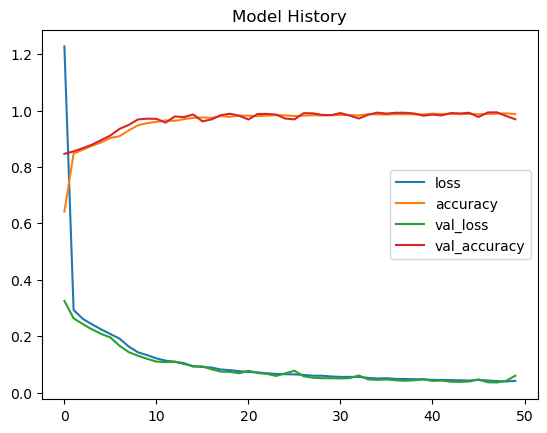

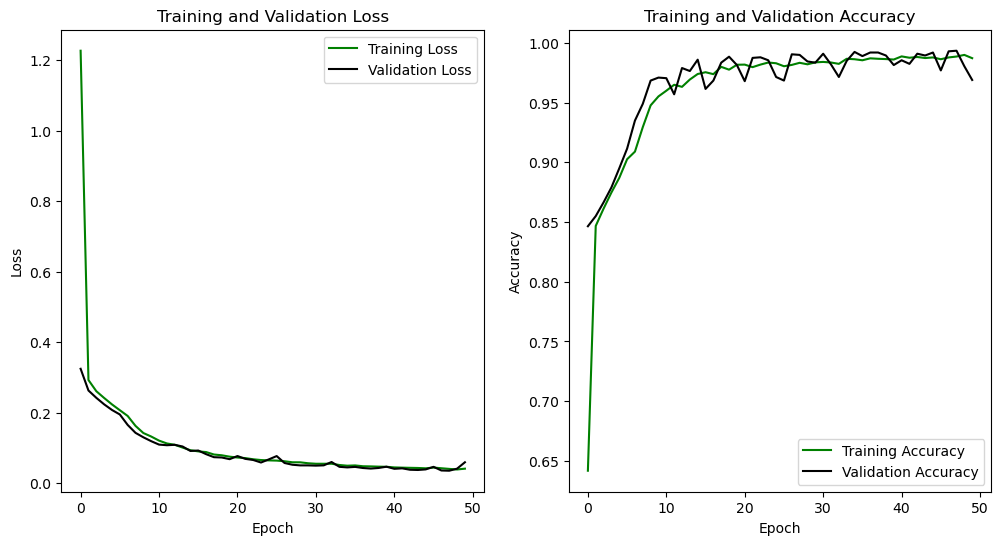

In [6]:
#візуалізація
pd.DataFrame(history.history).plot(title="Model History")

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color = 'g')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'black')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'g')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color = 'black')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

Як бачимо по графікам, модель працює, але присутнє певною мірою перенавчання. Хоч і так, з параметром оптимізатора _learning rate=0.0005_ ми отримуємо найвищі показники точності і найнижчі показники втрат.

In [7]:
#нейронка 4 шари
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer_1 = tf.keras.optimizers.Adam(learning_rate=0.000006)

#компіляція моделі
model_1.compile(optimizer=optimizer_1, loss='binary_crossentropy', metrics=['accuracy'])

#тренуємо модель 300 епох
history_1 = model_1.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

#оцінка ефективності моделі на тестовому наборі
y_pred_1 = model_1.predict(X_test)
test_loss_1, test_acc_1 = model_1.evaluate(X_train, y_train)

print(f'Тестова точність: {test_acc_1}')
print(f'Тестові втрати: {test_loss_1}')

Epoch 1/300
250/250 [==============================] - 2s 5ms/step - loss: 0.4219 - accuracy: 0.8092 - val_loss: 0.3439 - val_accuracy: 0.8360
Epoch 2/300
250/250 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8300 - val_loss: 0.3156 - val_accuracy: 0.8365
Epoch 3/300
250/250 [==============================] - 1s 5ms/step - loss: 0.3189 - accuracy: 0.8313 - val_loss: 0.3059 - val_accuracy: 0.8360
Epoch 4/300
250/250 [==============================] - 1s 4ms/step - loss: 0.3128 - accuracy: 0.8314 - val_loss: 0.3011 - val_accuracy: 0.8370
Epoch 5/300
250/250 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.8319 - val_loss: 0.2979 - val_accuracy: 0.8370
Epoch 6/300
250/250 [==============================] - 1s 4ms/step - loss: 0.3057 - accuracy: 0.8328 - val_loss: 0.2959 - val_accuracy: 0.8355
Epoch 7/300
250/250 [==============================] - 1s 4ms/step - loss: 0.3026 - accuracy: 0.8317 - val_loss: 0.2928 - val_accuracy: 0.8370

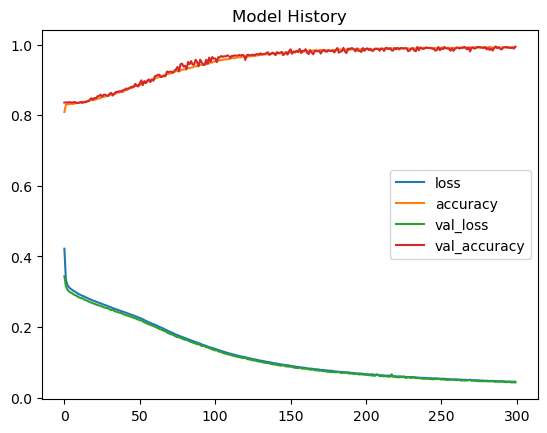

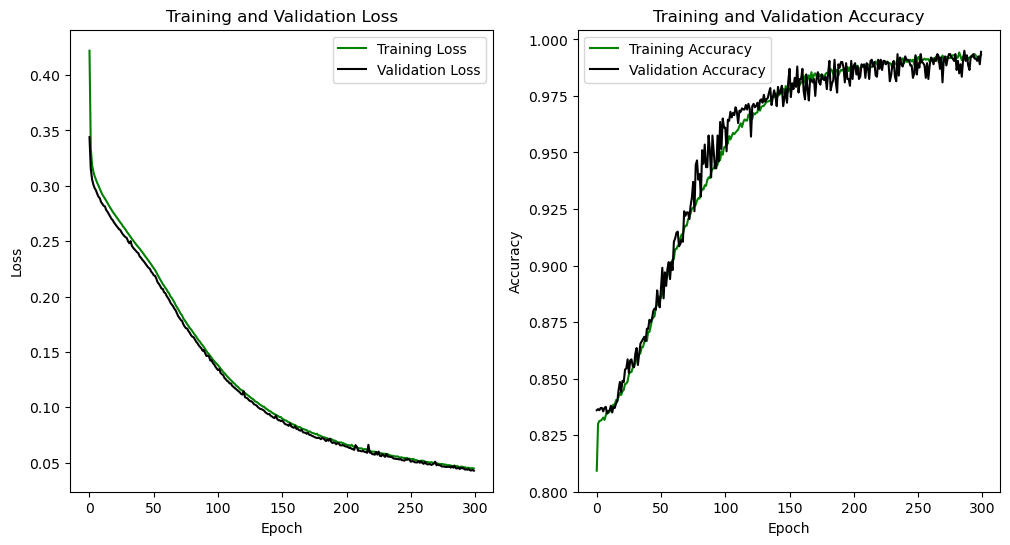

In [8]:
#візуалізація
pd.DataFrame(history_1.history).plot(title="Model History")

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss', color = 'g')
plt.plot(history_1.history['val_loss'], label='Validation Loss', color = 'black')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy', color = 'g')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy', color = 'black')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

Бачимо непогані результати. У цій модель разом зі збільшенням нейронів на шарі та збільшенням самих шарів та епох, я зменшив параметр оптимізатора Адам до 0.000006, щоб збільшити точність результатів. На графіку ми бачимо, що є елементи перенавчання, але вони не дуже критичні і в цілому протягом своєї роботи точність моделі лише збільшувалась. Хоча вона і не ідеальна.


### Мультикласова класифікація

Замість пройшов/не пройшов тепер у нас визначатиметься рівень оцінки. 
60-74 бали – це 3, “задовільно”, 75-89 – 4, “добре”, і 90-100 – 5, “відмінно”. Менше 60 - "перездача",  менше 36 - "повторний курс".

In [58]:
np.random.seed(19)

# Кількість атрибутів
n_samples = 10_000

# Два числові атрибути (оцінки студентів)
attribute_a = np.random.uniform(low=0, high=100, size=n_samples)
attribute_b = np.random.uniform(low=0, high=100, size=n_samples)

noise = np.random.uniform(low=-5, high=5, size=n_samples)  # Умовні додаткові бали
attribute_a += noise
attribute_b += noise

# Визначення класів
classes = np.zeros(n_samples)

classes[(attribute_a < 36) | (attribute_b < 36)] = 0  # Повторний курс
classes[(36 <= attribute_a) & (attribute_a < 60) & (36 <= attribute_b) & (attribute_b < 60)] = 1  # Перездача
classes[(60 <= attribute_a) & (attribute_a < 75) & (60 <= attribute_b) & (attribute_b < 75)] = 2  # Задовільно
classes[(75 <= attribute_a) & (attribute_a < 90) & (75 <= attribute_b) & (attribute_b < 90)] = 3  # Добре
classes[(90 <= attribute_a) & (90 <= attribute_b)] = 4  # Відмінно

# Створюємо датафрейм
data = pd.DataFrame({
    'Оцінка 1': attribute_a,
    'Оцінка 2': attribute_b,
    'Рейтинговий бал': classes
})

print(data.min().min())

# Зберігаємо
#data.to_csv('data_for_multiclass_classification.csv', index=False)

# Ознаки і цільова змінна
X = np.column_stack((attribute_a, attribute_b))
y = tf.keras.utils.to_categorical(classes, num_classes=5)

# Розбивка на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

-4.7633365799784535


In [59]:
#нейронка
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

#компіляція моделі
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#тренуємо модель 300 епох
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

#оцінка ефективності моделі на тестовому наборі
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_train, y_train)

print(f'Тестова точність: {test_acc}')
print(f'Тестові втрати: {test_loss}')

Epoch 1/30
250/250 [==============================] - 1s 3ms/step - loss: 45.0337 - accuracy: 0.0255 - val_loss: 42.2097 - val_accuracy: 0.0225
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 37.2534 - accuracy: 0.0255 - val_loss: 34.4536 - val_accuracy: 0.0225
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 29.9368 - accuracy: 0.0255 - val_loss: 27.1823 - val_accuracy: 0.0225
Epoch 4/30
250/250 [==============================] - 1s 2ms/step - loss: 23.0114 - accuracy: 0.0255 - val_loss: 20.2578 - val_accuracy: 0.0225
Epoch 5/30
250/250 [==============================] - 1s 2ms/step - loss: 16.3825 - accuracy: 0.0259 - val_loss: 13.6491 - val_accuracy: 0.0230
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 10.1743 - accuracy: 0.0935 - val_loss: 7.8060 - val_accuracy: 0.1950
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 5.4833 - accuracy: 0.2848 - val_loss: 3.8916 - val_accuracy: 0.

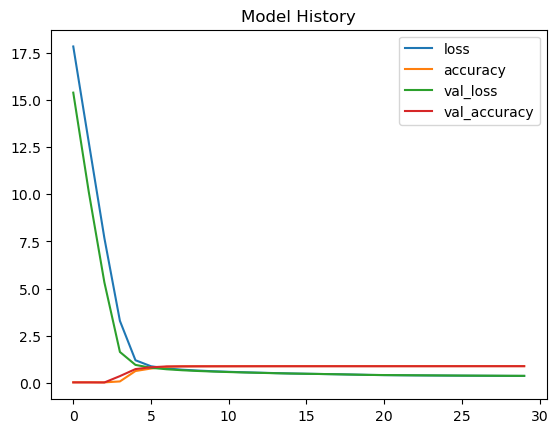

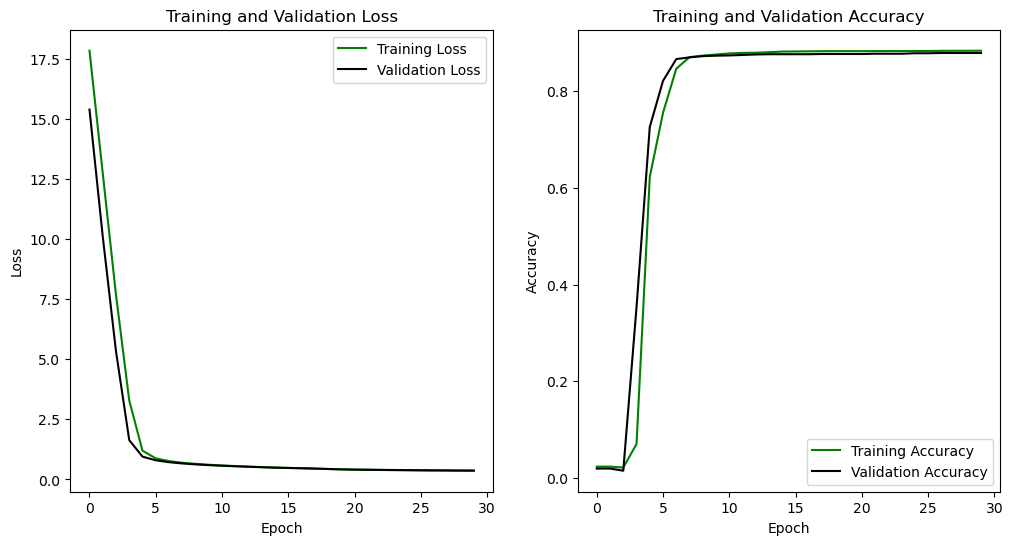

In [11]:
pd.DataFrame(history.history).plot(title="Model History")

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color = 'g')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'black')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'g')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color = 'black')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

In [44]:
#нейронка 4 шари
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.0001)

#компіляція моделі
model2.compile(optimizer=optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

#тренуємо модель 300 епох
history2 = model2.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

#оцінка ефективності моделі на тестовому наборі
y_pred2 = model2.predict(X_test)
test_loss2, test_acc2 = model2.evaluate(X_train, y_train)

print(f'Тестова точність: {test_acc2}')
print(f'Тестові втрати: {test_loss2}')

Epoch 1/300


250/250 [==============================] - 2s 3ms/step - loss: 1.3932 - accuracy: 0.8044 - val_loss: 0.8743 - val_accuracy: 0.8790
Epoch 2/300
250/250 [==============================] - 1s 3ms/step - loss: 0.8039 - accuracy: 0.8840 - val_loss: 0.7909 - val_accuracy: 0.8790
Epoch 3/300
250/250 [==============================] - 1s 2ms/step - loss: 0.7402 - accuracy: 0.8849 - val_loss: 0.7405 - val_accuracy: 0.8790
Epoch 4/300
250/250 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.8849 - val_loss: 0.6779 - val_accuracy: 0.8800
Epoch 5/300
250/250 [==============================] - 1s 2ms/step - loss: 0.6450 - accuracy: 0.8831 - val_loss: 0.6543 - val_accuracy: 0.8790
Epoch 6/300
250/250 [==============================] - 1s 2ms/step - loss: 0.6176 - accuracy: 0.8859 - val_loss: 0.6229 - val_accuracy: 0.8805
Epoch 7/300
250/250 [==============================] - 1s 2ms/step - loss: 0.5978 - accuracy: 0.8859 - val_loss: 0.6017 - val_accuracy: 0.8820
Epoch 8/300

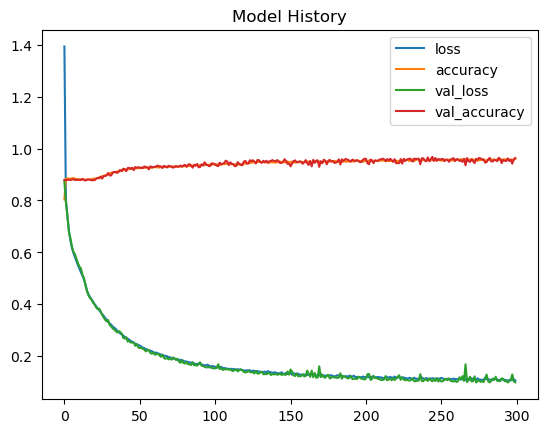

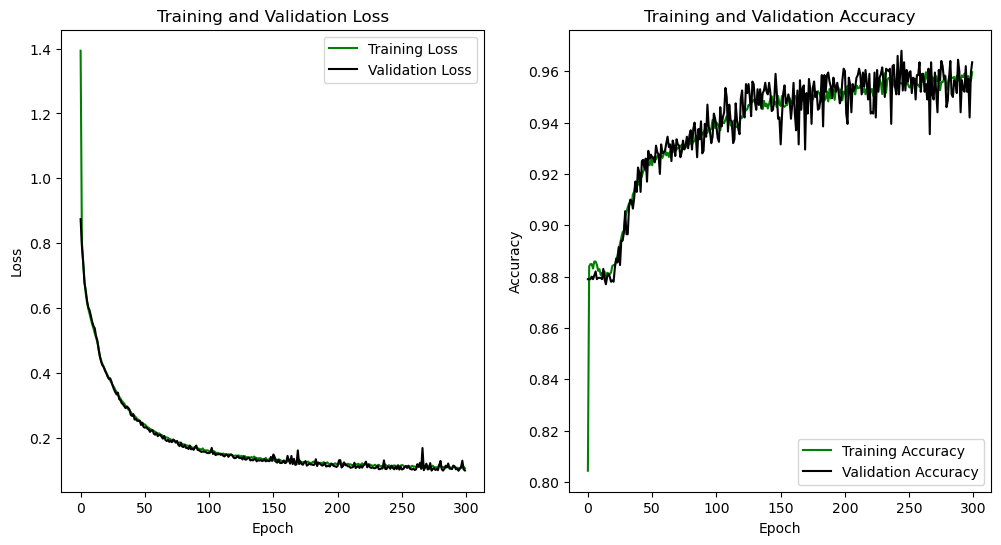

In [45]:
pd.DataFrame(history2.history).plot(title="Model History")

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss', color = 'g')
plt.plot(history2.history['val_loss'], label='Validation Loss', color = 'black')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy', color = 'g')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy', color = 'black')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

Отже, збільшивши кількість шарів, кількість нейронів та кількість епох ми отримуємо 

а) поступове зменшення втрат - у мене вийшло знизити до 10%

б) ПЕРЕНАВЧАННЯ - дуже добре видно на графіку

Тому сенсу збільшувати кількість епох чи кількість шарів нейромережі я не бачу.

Наприкінець - візуалізація датасету)

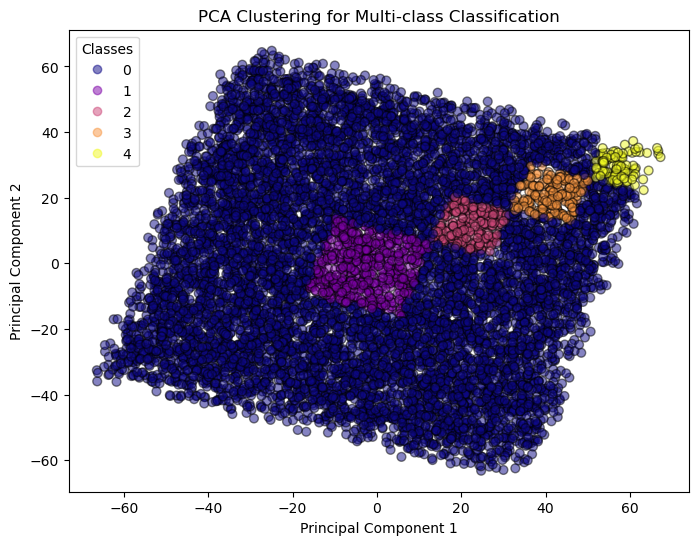

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Створюємо графік кластеризації
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.argmax(y, axis=1), cmap='plasma', edgecolor='k', s=40, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clustering for Multi-class Classification')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()